In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sin, cos, sqrt, atan2

# Import TF parameter data

In [2]:
data_file = "./data/TF_param.txt"
TF_df = pd.read_table(data_file)

TF_df.head()

,Unnamed: 0,pid,ptlon,ptlat,tfl,insl,insw,x_rti,az,lort,...,llon2,llat2,rlon2,rlat2,vhalf,obsaz,predaz_morvel,predaz_tf,sigc,bias
0,UNN,1.0,171.27,-63.36,64.4,50.0,2.0,28.2,146.0,1,...,169.400391,-63.493690,173.039062,-63.225710,23.8,-56.0,-54.31,-55.42,1.32,-0.31
1,Pitman,1.0,-170.78,-64.55,66.8,52.0,4.0,30.5,138.0,1,...,184.816406,-65.680001,192.884766,-63.273182,27.6,-48.0,-47.51,-48.00,2.54,-0.80
2,Saint_Exupery,1.0,-155.47,-62.25,46.6,40.0,4.0,23.5,127.0,1,...,202.675781,-63.090781,208.722656,-59.471873,31.8,-37.0,-38.23,-38.45,3.30,-1.22
3,Le_Geographe,1.0,-147.48,-57.63,67.3,55.0,4.0,33.5,122.0,1,...,209.636719,-59.765248,215.173828,-55.647839,35.5,-32.0,-31.95,-32.11,2.40,-0.93
4,Tharp,1.0,-131.44,-54.52,464.5,280.0,12.0,213.5,113.0,1,...,224.815430,-54.678913,-127.450000,-54.850000,39.3,-23.0,-23.89,-23.78,1.42,-0.04


In [3]:
#sns.pairplot(TF_df)

In [39]:
def angdist_l(row):

     
    R = 6373.0

    lat1 = np.radians(row["llat1"])
    lon1 = np.radians(row["llon1"])
    lat2 = np.radians(row["llat2"])
    lon2 = np.radians(row["llon2"])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c / row["stcr_l"]
    return (distance)
#print "Result", distance
#print "Should be", 278.546

def angdist_r(row):

    R = 6373.0

    lat1 = np.radians(row["rlat1"])
    lon1 = np.radians(row["rlon1"])
    lat2 = np.radians(row["rlat2"])
    lon2 = np.radians(row["rlon2"])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c / row["stcr_r"]
    return (distance)



In [5]:
#TF_df["Unnamed: 0"]
TF_df = TF_df.drop('Unnamed: 0',axis=1)
TF_df = TF_df.loc[TF_df["tfl"]<300,:]


NameError: name 'llat1' is not defined

In [41]:
# add w1 and w2 columns
TF_df["w1"] = TF_df.apply(lambda row: angdist_l(row) , axis=1)
TF_df["w2"] = TF_df.apply(lambda row: angdist_r(row) , axis=1)

TF_df.head()

,pid,ptlon,ptlat,tfl,insl,insw,x_rti,az,lort,llon1,...,rlon2,rlat2,vhalf,obsaz,predaz_morvel,predaz_tf,sigc,bias,w1,w2
0,1.0,171.27,-63.36,64.4,50.0,2.0,28.2,146.0,1,170.965,...,173.039062,-63.225710,23.8,-56.0,-54.31,-55.42,1.32,-0.31,87.184950,80.775833
1,1.0,-170.78,-64.55,66.8,52.0,4.0,30.5,138.0,1,-171.190,...,192.884766,-63.273182,27.6,-48.0,-47.51,-48.00,2.54,-0.80,239.574617,227.802941
2,1.0,-155.47,-62.25,46.6,40.0,4.0,23.5,127.0,1,204.188,...,208.722656,-59.471873,31.8,-37.0,-38.23,-38.45,3.30,-1.22,133.573548,383.395348
3,1.0,-147.48,-57.63,67.3,55.0,4.0,33.5,122.0,1,212.045,...,215.173828,-55.647839,35.5,-32.0,-31.95,-32.11,2.40,-0.93,290.978211,273.640360
7,1.0,-120.10,-54.34,85.1,75.0,3.0,42.9,110.0,1,239.282,...,240.583008,-54.367759,40.4,-20.0,-18.84,-18.51,1.32,-0.30,207.846966,6.120827


# Build basic linear regression models

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [ ]:
TF_df.describe()

#Find and remove null values
#dataset.isnull().any()
#dataset = dataset.fillna(method='ffill')


# Try simple linear regression first

In [ ]:
X = TF_df["vhalf"].values.reshape(-1,1)
y = TF_df["tfl"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

df

# Multiple Linear Regression

In [64]:
# Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.

X = TF_df[["ptlon", "ptlat", "az", "lort", "w1", "w2", "stcr_l", "stcr_r", "vhalf"]]

y = TF_df["tfl"]

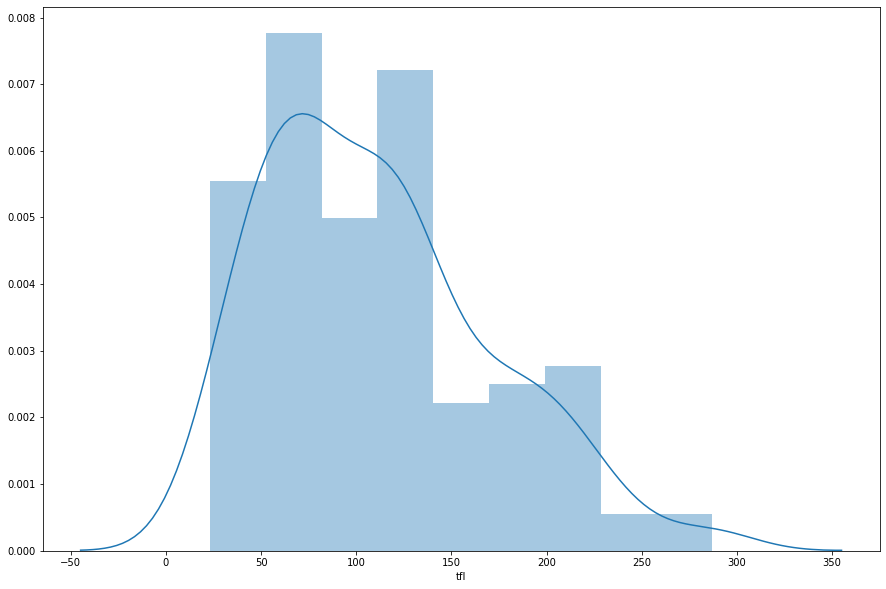

In [65]:
#Let's check the average value of the “TF length” column

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(TF_df['tfl'])

In [66]:
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
print (X_train)

[[-1.38000000e+01 -1.63000000e+01  7.70000000e+01  2.00000000e+00
   8.12686865e+01  2.31454243e+02  2.00000000e+00  1.00000000e+00
   1.61000000e+01]
 [-1.04960000e+02 -4.54000000e+00  1.02000000e+02  2.00000000e+00
   2.15711817e+02  6.93954446e+01  1.00000000e+00  1.00000000e+00
   6.31000000e+01]
 [ 2.55250000e+01 -5.30090000e+01  2.10000000e+01  1.00000000e+00
   7.22684539e+02  1.22619368e+02  1.00000000e+00  1.00000000e+00
   8.10000000e+00]
 [ 1.83000000e+00 -5.43700000e+01  4.40000000e+01  1.00000000e+00
   9.79538192e+01  1.93498535e+02  1.00000000e+00  1.00000000e+00
   7.30000000e+00]
 [-1.03400000e+02  8.37000000e+00  8.15000000e+01  1.00000000e+00
   9.93801156e+01  6.79812493e+02  2.00000000e+00  2.00000000e+00
   5.49000000e+01]
 [ 6.92800000e+01 -2.27500000e+01  5.80000000e+01  2.00000000e+00
   2.69975994e+02  5.58798391e+01  1.00000000e+00  1.00000000e+00
   2.27000000e+01]
 [-9.15400000e+01 -4.10900000e+01  8.40000000e+01  1.00000000e+00
   4.80839280e+01  1.7973272

In [67]:
#Now lets train our model.
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
#in the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
ptlon,-0.128386
ptlat,0.088326
az,-0.106669
lort,11.321403
w1,0.083435
w2,0.086997
stcr_l,-18.166878
stcr_r,-26.746466
vhalf,-0.491242


In [69]:
#Now let's do prediction on test data.

y_pred = regressor.predict(X_test)

In [52]:
#Check the difference between the actual value and predicted value.

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(25)

,Actual,Predicted
0,36.7,110.059249
1,144.6,187.387738
2,121.7,134.968854
3,76.6,118.818749
4,121.7,134.959132
5,120.9,39.111088
6,49.3,130.353413
7,121.7,134.919250
8,85.3,88.690903
9,134.4,89.868830


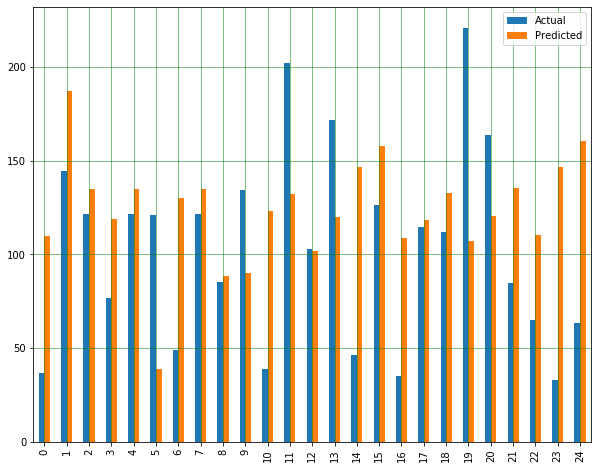

In [70]:
#Now let's plot the comparison of Actual and Predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [71]:
#The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following script:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 52.373128620378594
Mean Squared Error: 3924.584983356252
Root Mean Squared Error: 62.64650814974648
